<a href="https://colab.research.google.com/github/fadhilayosof/k-means-project/blob/main/Copy_of_k_means_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [ ]:
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [ ]:
df= pd.read_csv('/content/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730.0,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574.0,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148.0,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436.0,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730.0,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [ ]:
data=df.drop(['Year Type','Organization Group','Department','Union', 'Job Family', 'Job', 'Salaries',	'Overtime', 'Other Salaries', 'Health and Dental',	'Other Benefits','Organization Group Code',	'Union Code',	'Employee Identifier',	'Total Salary',	'Job Family Code',	'Job Code','Year',	'Department Code'], axis=1)
data.head()

,Retirement,Total Benefits,Total Compensation
0,11253.16,27747.13,85281.78
1,10284.88,22216.82,79895.32
2,12495.83,30116.78,93649.71
3,19644.45,40021.45,134237.37
4,1083.90,2428.31,7512.31


In [ ]:
data.dtypes

Retirement            float64
Total Benefits        float64
Total Compensation    float64
dtype: object

In [ ]:
data.isnull().sum()

Retirement            1
Total Benefits        1
Total Compensation    1
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Retirement            0
Total Benefits        0
Total Compensation    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418928 entries, 0 to 418927
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Retirement          418928 non-null  float64
 1   Total Benefits      418928 non-null  float64
 2   Total Compensation  418928 non-null  float64
dtypes: float64(3)
memory usage: 12.8 MB


In [ ]:
data.nunique()

Retirement            287727
Total Benefits        390522
Total Compensation    408419
dtype: int64

In [ ]:
#K-Means model with two clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [ ]:
#K-Means model parameters study
kmeans.cluster_centers_

array([[ 26548.06189649,  48318.80786391, 202210.59610453],
       [  2230.18056989,   6358.60973287,  23170.80275674],
       [ 14915.20690878,  33080.40493732, 112583.13136054]])

In [ ]:
y=kmeans.labels_
print(y)

[2 2 2 ... 2 2 2]


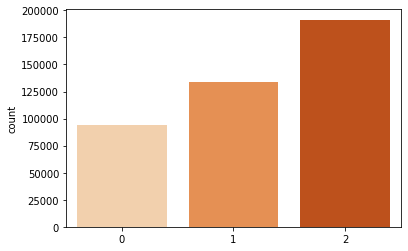

In [ ]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

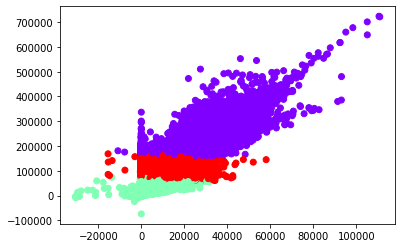

In [ ]:
plt.scatter(data.iloc[:,0].values,data.iloc[:,2].values, c=kmeans.labels_, cmap="rainbow")
plt.show()

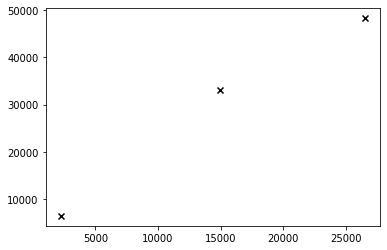

In [ ]:
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Retirement,Total Benefits,Total Compensation
0,0.124502,0.306987,0.943535
1,0.123081,0.265872,0.956119
2,0.126012,0.303708,0.944395
3,0.138882,0.282943,0.949029
4,0.136013,0.304716,0.942682


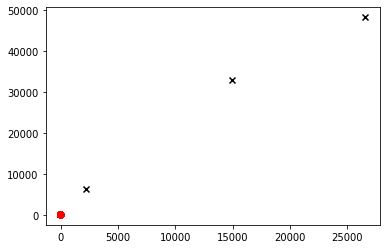

In [ ]:
plt.scatter(data_scaled.iloc[:,0].values,data_scaled.iloc[:,2].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

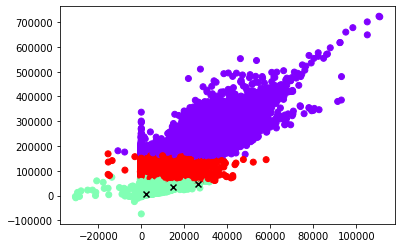

In [ ]:
plt.scatter(data.iloc[:,0].values,data.iloc[:,2].values, c=kmeans.labels_, cmap="rainbow")
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.show()

In [ ]:
kmeans.inertia_

331782524829585.06

In [ ]:
#Hierarchical clustering
import scipy.cluster.hierarchy as sch 